In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [2]:
df=pd.read_csv('D:/Mahnoor 5th Semester/Machine Learning/purchase_history.csv')
df

,user_id,image_id,file_name,width,height,category,style,rating,season,occasion
0,user_1,1,000001.jpg,468,624,sling dress,sling dress,5,summer,casual
1,user_1,1,000001.jpg,468,624,vest,vest,5,summer,casual
2,user_2,2,000002.jpg,468,624,sling dress,sling dress,5,summer,casual
3,user_2,2,000002.jpg,468,624,vest,vest,5,summer,casual
4,user_3,3,000003.jpg,468,628,short sleeve dress,short sleeve dress,5,summer,casual
...,...,...,...,...,...,...,...,...,...,...
52485,user_49,32149,032149.jpg,880,1321,long sleeve dress,long sleeve dress,5,summer,casual
52486,user_50,32150,032150.jpg,880,1321,long sleeve dress,long sleeve dress,5,summer,casual
52487,user_51,32151,032151.jpg,880,1321,long sleeve dress,long sleeve dress,5,summer,casual
52488,user_52,32152,032152.jpg,880,1321,long sleeve dress,long sleeve dress,5,summer,casual


In [3]:
print(df.head())

  user_id  image_id   file_name  width  height            category  \
0  user_1         1  000001.jpg    468     624         sling dress   
1  user_1         1  000001.jpg    468     624                vest   
2  user_2         2  000002.jpg    468     624         sling dress   
3  user_2         2  000002.jpg    468     624                vest   
4  user_3         3  000003.jpg    468     628  short sleeve dress   

                style  rating  season occasion  
0         sling dress       5  summer   casual  
1                vest       5  summer   casual  
2         sling dress       5  summer   casual  
3                vest       5  summer   casual  
4  short sleeve dress       5  summer   casual  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52490 entries, 0 to 52489
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    52490 non-null  object
 1   image_id   52490 non-null  int64 
 2   file_name  52490 non-null  object
 3   width      52490 non-null  int64 
 4   height     52490 non-null  int64 
 5   category   52490 non-null  object
 6   style      52490 non-null  object
 7   rating     52490 non-null  int64 
 8   season     52490 non-null  object
 9   occasion   52490 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.0+ MB
None


In [5]:
print(df.isnull().sum())

user_id      0
image_id     0
file_name    0
width        0
height       0
category     0
style        0
rating       0
season       0
occasion     0
dtype: int64


C:\Users\LEGEND\AppData\Local\Temp\ipykernel_16132\2663502949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order=top_cats, palette='viridis')


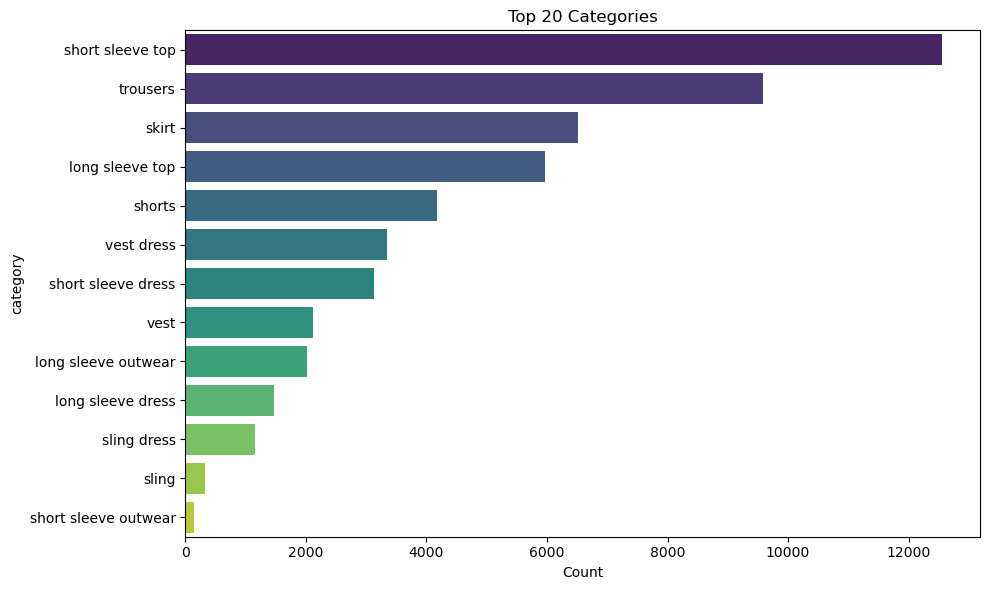

In [6]:
#1) Top categories (horizontal bar)
plt.figure(figsize=(10,6))
top_cats = df['category'].value_counts().nlargest(20).index
sns.countplot(y='category', data=df, order=top_cats, palette='viridis')
plt.title('Top 20 Categories')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

C:\Users\LEGEND\AppData\Local\Temp\ipykernel_16132\4086233032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='pastel')


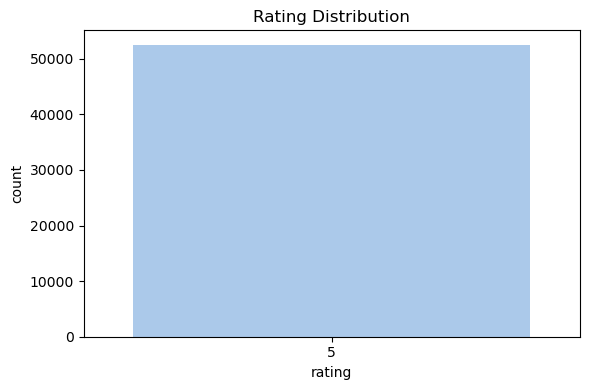

In [7]:
# 2) Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, palette='pastel')
plt.title('Rating Distribution')
plt.tight_layout()
plt.show()

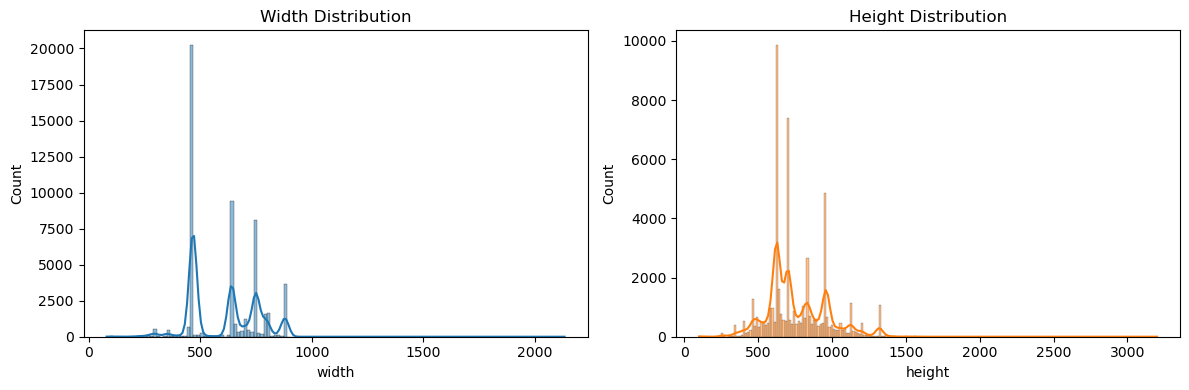

In [8]:
# 3) Width and Height distributions
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['width'], ax=axs[0], kde=True, color='C0')
axs[0].set_title('Width Distribution')
sns.histplot(df['height'], ax=axs[1], kde=True, color='C1')
axs[1].set_title('Height Distribution')
plt.tight_layout()
plt.show()

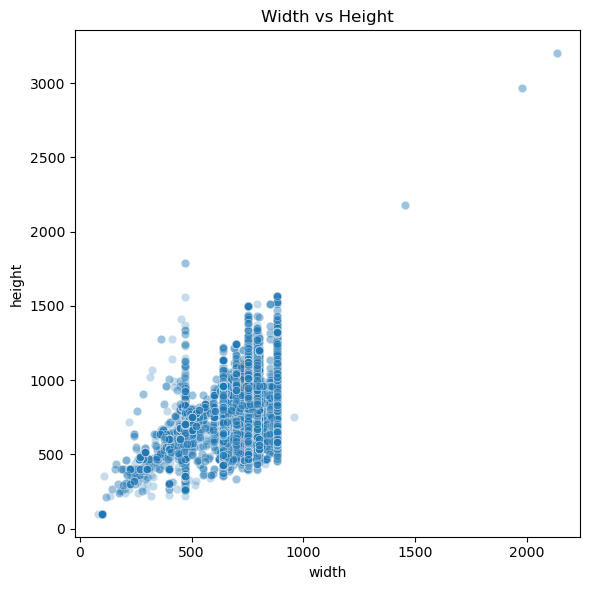

In [9]:
# 4) Width vs Height scatter
plt.figure(figsize=(6,6))
sns.scatterplot(x='width', y='height', data=df, alpha=0.25)
plt.title('Width vs Height')
plt.tight_layout()
plt.show()

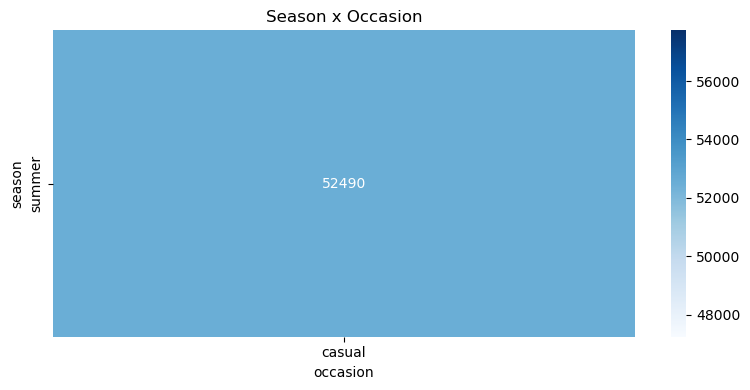

In [10]:
#5) Season vs Occasion counts (heatmap)
ct = pd.crosstab(df['season'], df['occasion'])
plt.figure(figsize=(8,4))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Season x Occasion')
plt.tight_layout()
plt.show()

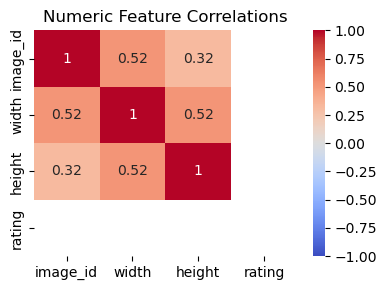

In [11]:
# 6) Correlation heatmap for numeric columns
num_corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(4,3))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numeric Feature Correlations')
plt.tight_layout()
plt.show()

In [12]:
print("MISSING VALUES:\n")
print(df.isnull().sum())

# Check duplicate rows
print("\nDUPLICATES:")
print(df.duplicated().sum())

MISSING VALUES:

user_id      0
image_id     0
file_name    0
width        0
height       0
category     0
style        0
rating       0
season       0
occasion     0
dtype: int64

DUPLICATES:
529


In [13]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check dataset shape before and after
print("Dataset shape after removing duplicates:")
print(df.shape)

Dataset shape after removing duplicates:
(51961, 10)


In [14]:
# Combine important fashion features into one column
df["combined_features"] = (
    df["category"] + " " +
    df["style"] + " " +
    df["season"] + " " +
    df["occasion"]
)

# Check the new column
print(df[["category", "style", "season", "occasion", "combined_features"]].head())

             category               style  season occasion  \
0         sling dress         sling dress  summer   casual   
1                vest                vest  summer   casual   
2         sling dress         sling dress  summer   casual   
3                vest                vest  summer   casual   
4  short sleeve dress  short sleeve dress  summer   casual   

                                   combined_features  
0              sling dress sling dress summer casual  
1                            vest vest summer casual  
2              sling dress sling dress summer casual  
3                            vest vest summer casual  
4  short sleeve dress short sleeve dress summer c...  


C:\Users\LEGEND\AppData\Local\Temp\ipykernel_16132\2925966459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["combined_features"] = (


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fix SettingWithCopyWarning safely
df.loc[:, "combined_features"] = df["combined_features"]

# Create TF-IDF vectors
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["combined_features"])

# Check shape of TF-IDF matrix
print("TF-IDF Matrix Shape:")
print(tfidf_matrix.shape)

TF-IDF Matrix Shape:
(51961, 13)


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_outfits_by_text(user_input, top_n=5):
    # Convert user input to TF-IDF
    user_vector = tfidf.transform([user_input])
    
    # Compute similarity with all outfits
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix)
    
    # Get top recommendations
    top_indices = similarity_scores[0].argsort()[::-1][:top_n]
    
    return df.iloc[top_indices][
        ["category", "style", "season", "occasion"]
    ]

# Test the function
test_output = recommend_outfits_by_text("summer casual dress")
print(test_output)

                 category               style  season occasion
26553  short sleeve dress  short sleeve dress  summer   casual
19450  short sleeve dress  short sleeve dress  summer   casual
10082  short sleeve dress  short sleeve dress  summer   casual
36855  short sleeve dress  short sleeve dress  summer   casual
10120  short sleeve dress  short sleeve dress  summer   casual


In [17]:
def recommend_outfits_by_text(user_input, top_n=5):
    user_vector = tfidf.transform([user_input])
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix)

    top_indices = similarity_scores[0].argsort()[::-1]

    # Remove duplicate outfit combinations
    recommended = (
        df.iloc[top_indices][
            ["category", "style", "season", "occasion"]
        ]
        .drop_duplicates()
        .head(top_n)
    )

    return recommended

# Test again
output = recommend_outfits_by_text("summer casual dress")
print(output)

                 category               style  season occasion
26553  short sleeve dress  short sleeve dress  summer   casual
31359   long sleeve dress   long sleeve dress  summer   casual
44240          vest dress          vest dress  summer   casual
42194         sling dress         sling dress  summer   casual
36773            trousers            trousers  summer   casual


In [18]:
#  Encode categorical features
from sklearn.preprocessing import LabelEncoder

features = ['category', 'style', 'season', 'occasion']
df_encoded = df.copy()

label_encoders = {}
for col in features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features for ML model
X = df_encoded[features]
y = df_encoded['rating']  # target variable

print("Feature sample:")
print(X.head())
print("Target sample:")
print(y.head())

Feature sample:
   category  style  season  occasion
0         9      9       0         0
1        11     11       0         0
2         9      9       0         0
3        11     11       0         0
4         3      3       0         0
Target sample:
0    5
1    5
2    5
3    5
4    5
Name: rating, dtype: int64


In [19]:
# Train-Test Split and Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression - MSE: {mse:.3f}, R2: {r2:.3f}")

Random Forest Regression - MSE: 0.000, R2: 1.000


In [20]:
# One-hot encode categorical features
import pandas as pd

features = ['category', 'style', 'season', 'occasion']
X_onehot = pd.get_dummies(df[features])

print("One-hot encoded feature shape:", X_onehot.shape)

One-hot encoded feature shape: (51961, 28)


In [21]:
import pandas as pd

# Features to use
features = ['category', 'style', 'season', 'occasion']

# One-hot encode categorical features
X_encoded = pd.get_dummies(df[features])

print("Encoded feature shape:", X_encoded.shape)

Encoded feature shape: (51961, 28)


In [22]:
from sklearn.neighbors import NearestNeighbors

# KNN for outfit similarity
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # top 5 + itself
knn.fit(X_encoded)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [23]:
def recommend_outfit(image_id, top_n=5):
    # Find index of the outfit
    idx = df.index[df['image_id'] == image_id][0]
    
    # Get nearest neighbors
    distances, indices = knn.kneighbors([X_encoded.iloc[idx]])
    
    # Skip the first one (itself)
    recommended_indices = indices[0][1:top_n+1]
    
    return df.iloc[recommended_indices][['image_id', 'file_name', 'category', 'style', 'season', 'occasion']]

# Example
recommend_outfit(df['image_id'].iloc[0], top_n=5)

d:\mahnoor_anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,image_id,file_name,category,style,season,occasion
47066,29091,029091.jpg,sling dress,sling dress,summer,casual
47073,29094,029094.jpg,sling dress,sling dress,summer,casual
47071,29093,029093.jpg,sling dress,sling dress,summer,casual
47075,29095,029095.jpg,sling dress,sling dress,summer,casual
2549,1784,001784.jpg,sling dress,sling dress,summer,casual


In [24]:
!pip install gradio

In [27]:
!python -m pip install --upgrade pip setuptools wheel
!pip install brotli
!pip install gradio --upgrade


In [29]:
!pip install flask

In [30]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# --- Load your dataset ---
df = pd.read_csv(r"D:/Mahnoor 5th Semester/Machine Learning/purchase_history.csv")  # Replace with your dataset path

# --- One-hot encode categorical features ---
features = ['category', 'style', 'season', 'occasion']
X_encoded = pd.get_dummies(df[features])

# --- Train KNN model ---
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # top 5 + itself
knn.fit(X_encoded)

# --- Recommendation function ---
def recommend_outfit(image_id, top_n=5):
    try:
        idx = df.index[df['image_id'] == int(image_id)][0]
        distances, indices = knn.kneighbors([X_encoded.iloc[idx]])
        recommended_indices = indices[0][1:top_n+1]  # skip itself
        rec_df = df.iloc[recommended_indices][['image_id', 'file_name', 'category', 'style', 'season', 'occasion']]
        # Convert to list of dicts for JSON
        rec_list = rec_df.to_dict(orient='records')
        return rec_list
    except:
        return []

# --- Flask app ---
app = Flask(__name__)

@app.route('/recommend', methods=['GET'])
def recommend():
    image_id = request.args.get('image_id', type=int)
    if image_id is None:
        return jsonify({"error": "Please provide an image_id"}), 400

    recommendations = recommend_outfit(image_id)
    if not recommendations:
        return jsonify({"error": "Invalid image_id"}), 400

    return jsonify({"recommendations": recommendations})

# --- Run the app ---
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

d:\mahnoor_anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import gradio as gr
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# --- Load your dataset ---
df = pd.read_csv(r"D:/Mahnoor 5th Semester/Machine Learning/purchase_history.csv")  

# --- One-hot encode categorical features ---
features = ['category', 'style', 'season', 'occasion']
X_encoded = pd.get_dummies(df[features])

# --- Train KNN model ---
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # top 5 + itself
knn.fit(X_encoded)

# --- Recommendation function ---
def recommend_outfit(image_id, top_n=5):
    try:
        idx = df.index[df['image_id'] == int(image_id)][0]
        distances, indices = knn.kneighbors([X_encoded.iloc[idx]])
        recommended_indices = indices[0][1:top_n+1]  # skip itself
        rec_df = df.iloc[recommended_indices][['image_id', 'file_name', 'category', 'style', 'season', 'occasion']]
        # Format for display
        rec_list = []
        for i, row in rec_df.iterrows():
            rec_list.append(f"ID: {row['image_id']}, Category: {row['category']}, Style: {row['style']}, Season: {row['season']}, Occasion: {row['occasion']}")
        return "\n".join(rec_list)
    except:
        return "Invalid Image ID. Please enter a valid ID from the dataset."

# --- Gradio interface ---
inputs = gr.Number(label="Enter Outfit Image ID")
outputs = gr.Textbox(label="Top 5 Recommended Outfits")

gr.Interface(fn=recommend_outfit, inputs=inputs, outputs=outputs, title="Fashion Outfit Recommender", description="Enter an Image ID to get top 5 similar outfits.").launch(share=True)
